

```

# Binary Image Classifier

The purpose of this assignment is to get you comfortable creating your own datasets — in our case, datasets of images — and classifying them with a deep neural network.

We will not delve deep into _how_ things work just yet. Instead, we want you to be able create a dataset of your own and hack together a classifier that nobody has made before.

Please note that you will need to leave enough time to do this assignment. Downloading things from the web can be slow — it's not uncommon to get throttled down. It's also possible — though unlikely — that somehow you cannot train the DNN for your task, in which case you will have to find an alternate task / images. Ensure you have left enough time for that.


## Deliverables

The deliverables will be

- the dataset you create, and
- a filled-in version of this notebook, including the code and discussion.

As before, you will push your changes to GitHub to submit the assignment.

See the task descriptions for details.


## Task 1

Work through the transfer learning notebook. When you are doing that, actalluy _type things in_ rather than just pressing shift+enter in every cell — this sounds silly, but it actually makes your brain think more about what you are typing in. Make sure you understand things like the shape of the tensor returned from the data loader, and why it is like that.

There are no deliverables for Task 1.


## Task 2

Create a dataset with two classes of colour images, all of roughly similar aspect ratio, that you will later classify using a deep neural network. The images should be sourced from the web.

You **may not** use images that are already in assembled in a “machine-learning-ready” dataset. We want you to learn to create your own datasets, not just download someone else's.

The dataset should be of difficulty comparable to the task from Lecture 2. It should be solvable by knowledgeable humans with some effort — like distinguishing our two airliners. Something like the MNIST datasets we used in Lecture 1 is far too easy. You final dataset should have about 1000+ images split evenlly between the two each classes. You may find that for some tasks you need more images (this is not too common).

Also, the two classes **must not** be already included in the ImageNet competition [classes](http://image-net.org/challenges/LSVRC/2017/browse-synsets) that our baseline DNN is already trained for. For example, the 737 vs. A320 task is fine because this list (and our pretrained ResNet18) does not distinguish between those two airliners. Distinguishing betwee classes in the list — say pretzels and coffee mugs (topologically interesting as the question may be) — is already done by the pretrained baseline model.

Please make sure the images are **not illegal or offensive**. Keep in mind your submission will be marked by TAs who are students; be considerate.

In the unlikely case that you cannot train the DNN for your task, you will have to find an alternate dataset, so make sure you have left enough time for that. 

### Deliverables

These are the dataset description, the methods used to collect the images, and the set of images.

**Dataset description.**

- what the two image classes are,
- how a knowledgeable human would typically distinguish them, and
- the sources for the images you used.

Describe the dataset in the cell below.

The dataset is of two different tanks. The first one is the M551 Sheridan, a light tank used in the Vietnam war. The second one is a M24 Chaffee, a light tank that saw use in the Korean war and First IndoChina War. A distinguishing feature between these two tanks is size of the weaponry. The main cannon on the Chaffee is 75 mm whereas the main cannon on the Sheridan is 152 mm.

Images are scraped from Bing using the bing_image_downloader modulelibrary sourced from https://github.com/gurugaurav/bing_image_downloader




**Code/retrieval methods.**

In the cell below, include the code you used to retrieve and organize the images, including downloading, parsing the image URLs and the labels, and so forth.

If you used non-Python code or shell commands, paste it in in Markdown cell. If some manual steps were included, describe them in enough detail that they can be easily reproduced by another student.

Feel free to add more cells here pro re nata.

In [ ]:
import torch, torchvision, PIL, numpy as np
from torchvision import datasets, models, transforms
from torch import nn, optim
import pathlib
import PIL
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm.auto import tqdm
torch.manual_seed(0)
np.random.seed(0)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/ostrolucky/Bulk-Bing-Image-downloader.git
# Clone Bulk Bing Image downloader into local machine

Cloning into 'Bulk-Bing-Image-downloader'...
remote: Enumerating objects: 31, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 178 (delta 15), reused 21 (delta 7), pack-reused 147
Receiving objects: 100% (178/178), 47.13 KiB | 7.86 MiB/s, done.
Resolving deltas: 100% (94/94), done.


In [ ]:
# These commands were run on a Linux terminal
!cd Bulk-Bing-Image-downloader
!python3 bbid.py -s "m24 chaffee" -o "m24 chaffee" --limit 600
!python3 bbid.py -s "m551 sheridan" -o "m551 sheridan" --limit 600

# run bbid.py script for m24 and m551 sheridan

python3: can't open file 'bbid.py': [Errno 2] No such file or directory
python3: can't open file 'bbid.py': [Errno 2] No such file or directory


In [ ]:
xform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])
dataset_full = datasets.ImageFolder('drive/MyDrive/datasets', transform=xform)

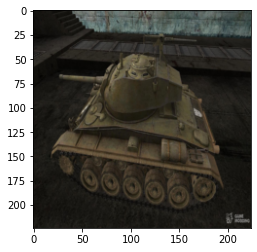

In [ ]:
plt.imshow(dataset_full[0][0].permute(1,2,0))

In [ ]:
n_all = len(dataset_full)
n_train = int(0.8 * n_all)
n_test = n_all - n_train
rng = torch.Generator().manual_seed(1549)
dataset_train, dataset_test = torch.utils.data.random_split(dataset_full, [n_train, n_test], rng)

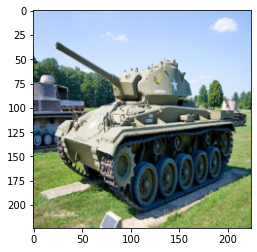

In [ ]:
plt.imshow(dataset_train[0][0].permute(1,2,0))

In [ ]:
loader_train = torch.utils.data.DataLoader(dataset_train, batch_size = 4, shuffle=True)
loader_test = torch.utils.data.DataLoader(dataset_test, batch_size = 4, shuffle=True)

**Dataset.**

Submit all images in your dataset in the `dataset` directory in your GitHub repository. You will need to create two subdirectories inside that correspond to the two classes, just like we did in Lecture 2.

## Task 3

Examine the dataset to find any images that do not correspond to the classification task you are solving.

For example, for the airliners task from Lecture 2, there was a picture of a wing taken from the inside of the passenger cabin. I also found (and rejected before class) several images of the passenger cabin interior of each plane. Neither corresponded to the task we specified, which was to distinguish the two airplanes from the outside. Another example might be photos that have both planes in the same photo.

It's pretty unlikely that you will have no rejects the first 1,000 images you find, but if you don't, search for more images like yours and eventually you will find something like the airliner image reject examples above.

Move all of the rejected images from `dataset` to `dataset-rejects` and document all of them below.

### Deliverables

**Dataset rejects.** Those should be in the `dataset-rejects` directory in your repo.

**Justification.** In the next cell, document why you rejected each image, giving the filename and the reason for rejection.

- 20th_Armoured_Division_(Greece_flag).png: any Logos of any companies or groups were removed. These are not photos of the tanks. 
- 255C_Chaffee_Product_Profile_NoPatch.png: Some Lego models of the tanks appeared in while downloading images. All Lego models were removed to allow the model to identify real tank features.
- d69bd409b02ec69a4a5bb83421f3938f--m-.jpg: Photos taken from inside the tanks were removed. These are not photos of the tank's exterior. 
- hqdefault-4.jpg: Photos from military video games such as "World of Tanks" were removed. These may not be indicative of the real world tank's features. 
- 20171105_222225-1.jpg: images of other vehicles were removed. These are not photos of the tanks.  
- 1196639-20627-37-pristine.jpg: images of parts of tank minature models were removed. These are not photos of the tanks. 
- image-1.jpg: Photos that did not have enough of a tank's key features were removed.
- tn_V-asher-00.jpg: Box art that included the tanks were not included. This may not be indicative of a real tank's features.
- 220px-15_Lancers_(Cureton's_Multanis.jpg: Images of people were remove. These are not photos of the tanks.
- 1730_r40_005.jpg: Images with lots of text were removed. This is to allow the model to avoid being influenced with large amounts of text in some samples.

## Task 4

Load the dataset and train a binary classifier using the same transfer learning technique we used in Lecture 2. It's probably easiest to start with ResNet18 as the pretrained baseline model in case you need to validate against the airliner task when you are debugging, but you can experiment with other pre-trained models that TorchVision provides. Feel free to reuse code from Lecture 2 as you need.

Training should be for as many epochs as is required to to reach “convergence”: that is, until the loss on your test set is not improving very much over several epochs.

Remember to activate the GPU in your Colab notebook, or else you will need to be very patient.

You should be able to get well above 90% accuracy on most datasets. If you can't get there, don't panic. Check every step from loading the images to constructing the loaders, and what is produced at every step. Visualize the tensors produced by the loader: do the images and labels make sense? If not, go back and track back to the dataset and maybe even your image directories and collection process. Most of these kinds of issues are because you are feeding your model junk — for example, when preparing Lecture 2, I accidentally mixed the images, and the network couldn't really distinguish the two classes.

You can also try some of the things in task 5 below to improve accuracy.

If you can't get things to work, check that everything works on the airliners example from lecture. If you get accuracy around 50% range on a decent dataset, it's almost certain that you screwed something up in the code rather than that there is a problem with the data. If all else fails — for example if your code works on the airliners but not your dataset — you might need to choose a different task and collect a new dataset.


### Deliverables

**Code and outputs.** Below, include all of the code and outputs relevant to this task. We should be able to reproduce all of the results by just executing your code. Feel free to insert more code or text cells pro re nata.

In [ ]:
# Use resnet18 as model
model = models.resnet18(pretrained=True)
#reduce to 2 outputs: m551 sheridan and m24 chaffee
model.fc = nn.Linear(model.fc.in_features, 2)
torch.nn.init.xavier_uniform_(model.fc.weight)


Parameter containing:
tensor([[ 0.0025,  0.0743, -0.0220,  ...,  0.0346, -0.0549, -0.0990],
        [-0.0562, -0.0327,  0.0301,  ...,  0.0544, -0.0034,  0.0459]],
       requires_grad=True)

In [ ]:
device = torch.device('cuda:0')
model = model.to(device)

In [ ]:
criterion = nn.CrossEntropyLoss()
def run_test(model):
    nsamples_test = len(dataset_test)
    loss, correct = 0, 0
    model.eval()
    with torch.no_grad():
        for samples, labels in loader_test:
            samples = samples.to(device)
            labels = labels.to(device)
            outs = model(samples)
            loss += criterion(outs, labels)
            _, preds = torch.max(outs.detach(), 1)
            correct_mask = preds == labels
            correct += correct_mask.sum(0).item()
    return loss / nsamples_test, correct / nsamples_test

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.010, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [ ]:
def run_train(model, opt, sched):
    nsamples_train = len(dataset_train)
    loss_sofar, correct_sofar = 0, 0
    model.train()
    with torch.enable_grad():
        for samples, labels in loader_train:
            samples = samples.to(device)
            labels = labels.to(device)
            opt.zero_grad()
            outs = model(samples)
            _, preds = torch.max(outs.detach(), 1)
            loss = criterion(outs, labels)
            loss.backward()
            opt.step()
            loss_sofar += loss.item() * samples.size(0)
            correct_sofar += torch.sum(preds == labels.detach())
    sched.step()
    return loss_sofar / nsamples_train, correct_sofar / nsamples_train


In [ ]:
def run_all(model, optimizer, scheduler, n_epochs):
    for epoch in range(n_epochs):
        loss_train, acc_train = run_train(model, optimizer, scheduler)
        loss_test, acc_test = run_test(model)
        print(f"epoch {epoch}: train loss {loss_train:.4f} acc {acc_train:.4f}, test loss {loss_test:.4f} acc {acc_test:.4f}")

In [ ]:
run_test(model)

(tensor(0.2766, device='cuda:0'), 0.5255102040816326)

In [ ]:
run_all(model, optimizer,scheduler, 10)

epoch 0: train loss 0.8025 acc 0.7207, test loss 0.0974 acc 0.8724
epoch 1: train loss 0.4057 acc 0.8661, test loss 0.1026 acc 0.8418
epoch 2: train loss 0.3976 acc 0.8661, test loss 0.0715 acc 0.8929
epoch 3: train loss 0.2701 acc 0.9031, test loss 0.1054 acc 0.8622
epoch 4: train loss 0.2617 acc 0.9171, test loss 0.0832 acc 0.8929
epoch 5: train loss 0.1487 acc 0.9426, test loss 0.0772 acc 0.8827
epoch 6: train loss 0.0756 acc 0.9834, test loss 0.0726 acc 0.9082
epoch 7: train loss 0.1095 acc 0.9605, test loss 0.0647 acc 0.9031
epoch 8: train loss 0.1569 acc 0.9464, test loss 0.0679 acc 0.9082
epoch 9: train loss 0.1631 acc 0.9388, test loss 0.0637 acc 0.9031


Results:
* epoch 0: train loss 0.8025 acc 0.7207, test loss 0.0974 acc 0.8724
*epoch 1: train loss 0.4057 acc 0.8661, test loss 0.1026 acc 0.8418
*epoch 2: train loss 0.3976 acc 0.8661, test loss 0.0715 acc 0.8929
*epoch 3: train loss 0.2701 acc 0.9031, test loss 0.1054 acc 0.8622
*epoch 4: train loss 0.2617 acc 0.9171, test loss 0.0832 acc 0.8929
*epoch 5: train loss 0.1487 acc 0.9426, test loss 0.0772 acc 0.8827
*epoch 6: train loss 0.0756 acc 0.9834, test loss 0.0726 acc 0.9082
*epoch 7: train loss 0.1095 acc 0.9605, test loss 0.0647 acc 0.9031
*epoch 8: train loss 0.1569 acc 0.9464, test loss 0.0679 acc 0.9082
*epoch 9: train loss 0.1631 acc 0.9388, test loss 0.0637 acc 0.9031

## Task 5

Finally, we will explore some parameters of the training process.

When you run experiments in this tasks, be sure to **reinitialize** the model starting from the pre-trained baseline. Otherwise you're just training the network for longer, and any improvement may not be due to the data augmentation.

### Part 1: Data augmentation

This is a technique to create more samples from the dataset you have, and hopefully improve the eventual accuracy. Flipping images horizontally or vertically is an example, as is randomly cropping them. Generally, some will be appropriate and some will not; for our airliner dataset, we probably do not expect commercial airliners to be upside-down in the air (and even more so the ground!), but a horizontal flip would be appropriate (and indeed often improves accuracy somewhat).

In PyTorch, these transforms are typically applied when creating the dataset, in just as the transforms we used to resize the image and convert it to a tensor. The PyTorch TorchVision module comes with [many such transforms](https://pytorch.org/docs/stable/torchvision/transforms.html). Note that transforms that are always applied — such as the resizing and conversion to a tensor we did in Lecture 2 — are not data augmentation because they do not increase the set of possible samples.

#### Deliverables

Pick **two** data augmentation transforms from TorchVision that would be appropriate for your task (you may pick more if you wish). For each of them, include the transform definition code (suitable for passing to `transform=` in a dataset constructor like `ImageFolder()`) in the cell below. Be sure that the transforms make sense on your dataset (see the airliner example above); if they clearly don't, you can lose marks.

In [ ]:
# I will transform the datasets horizontally as tanks can drive in many directions
# I will transform the dataset by applying some angular shifts as well as tanks may be seen driving on hills or on inclined surfaces

xform = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor()])
xformHorizontal = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(), transforms.RandomHorizontalFlip(1.0) ])
xformAngularShift = transforms.Compose([transforms.Resize((224,224)), transforms.ToTensor(), transforms.RandomRotation(degrees=(-35,35)) ])
dataset_full_horizontal = datasets.ImageFolder('drive/MyDrive/datasets', transform=xformHorizontal)
dataset_full_angular = datasets.ImageFolder('drive/MyDrive/datasets', transform=xformAngularShift)
dataset_full = datasets.ImageFolder('drive/MyDrive/datasets', transform=xform)

list_datasets = [dataset_full, dataset_full_angular, dataset_full_horizontal]
concat_dataset = torch.utils.data.ConcatDataset(list_datasets)

n_all = len(concat_dataset)
n_train = int(0.8 * n_all)
n_test = n_all - n_train
rng = torch.Generator().manual_seed(1549)

dataset_train, dataset_test = torch.utils.data.random_split(concat_dataset, [n_train, n_test], rng)

# Use resnet18 as model
model = models.resnet18(pretrained=True)
#reduce to 2 outputs: m551 sheridan and m24 chaffee
model.fc = nn.Linear(model.fc.in_features, 2)
torch.nn.init.xavier_uniform_(model.fc.weight)

loader_train = torch.utils.data.DataLoader(dataset_train, batch_size = 4, shuffle=True)
loader_test = torch.utils.data.DataLoader(dataset_test, batch_size = 4, shuffle=True)

criterion = nn.CrossEntropyLoss()
def run_test(model):
    nsamples_test = len(dataset_test)
    loss, correct = 0, 0
    model.eval()
    with torch.no_grad():
        for samples, labels in loader_test:
            samples = samples.to(device)
            labels = labels.to(device)
            outs = model(samples)
            loss += criterion(outs, labels)
            _, preds = torch.max(outs.detach(), 1)
            correct_mask = preds == labels
            correct += correct_mask.sum(0).item()
    return loss / nsamples_test, correct / nsamples_test

optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.2)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

device = torch.device('cuda:0')
model = model.to(device)

In [ ]:
def run_train(model, opt, sched):
    nsamples_train = len(dataset_train)
    loss_sofar, correct_sofar = 0, 0
    model.train()
    with torch.enable_grad():
        for samples, labels in loader_train:
            samples = samples.to(device)
            labels = labels.to(device)
            opt.zero_grad()
            outs = model(samples)
            _, preds = torch.max(outs.detach(), 1)
            loss = criterion(outs, labels)
            loss.backward()
            opt.step()
            loss_sofar += loss.item() * samples.size(0)
            correct_sofar += torch.sum(preds == labels.detach())
    sched.step()
    return loss_sofar / nsamples_train, correct_sofar / nsamples_train

def run_all(model, optimizer, scheduler, n_epochs):
    for epoch in range(n_epochs):
        loss_train, acc_train = run_train(model, optimizer, scheduler)
        loss_test, acc_test = run_test(model)
        print(f"epoch {epoch}: train loss {loss_train:.4f} acc {acc_train:.4f}, test loss {loss_test:.4f} acc {acc_test:.4f}")

In [ ]:
run_all(model, optimizer,scheduler, 10)

epoch 0: train loss 0.4640 acc 0.7755, test loss 0.0580 acc 0.9031
epoch 1: train loss 0.2955 acc 0.8741, test loss 0.0271 acc 0.9609
epoch 2: train loss 0.2708 acc 0.8831, test loss 0.0252 acc 0.9694
epoch 3: train loss 0.2456 acc 0.8967, test loss 0.0295 acc 0.9524
epoch 4: train loss 0.2106 acc 0.9188, test loss 0.0206 acc 0.9779
epoch 5: train loss 0.1896 acc 0.9154, test loss 0.0227 acc 0.9626
epoch 6: train loss 0.1726 acc 0.9247, test loss 0.0194 acc 0.9762
epoch 7: train loss 0.1756 acc 0.9324, test loss 0.0214 acc 0.9728
epoch 8: train loss 0.1471 acc 0.9405, test loss 0.0184 acc 0.9796
epoch 9: train loss 0.1627 acc 0.9371, test loss 0.0188 acc 0.9762


Re-run the training and show the outputs below. You don't need to paste all of the code again, you just need to show the outputs.

Very briefly point out any improvement / degradation of accuracy, or changes in how quickly the training converges (how many epochs) below.

Results:
* epoch 0: train loss 0.5380 acc 0.7840, test loss 0.0613 acc 0.9150
*epoch 1: train loss 0.4050 acc 0.8627, test loss 0.0320 acc 0.9507
*epoch 2: train loss 0.3179 acc 0.8929, test loss 0.0231 acc 0.9626
*epoch 3: train loss 0.1956 acc 0.9303, test loss 0.0196 acc 0.9660
*epoch 4: train loss 0.1137 acc 0.9634, test loss 0.0223 acc 0.9694
*epoch 5: train loss 0.0780 acc 0.9736, test loss 0.0121 acc 0.9830
*epoch 6: train loss 0.0552 acc 0.9809, test loss 0.0104 acc 0.9932
*epoch 7: train loss 0.0452 acc 0.9894, test loss 0.0118 acc 0.9864
*epoch 8: train loss 0.0396 acc 0.9902, test loss 0.0106 acc 0.9864
*epoch 9: train loss 0.0391 acc 0.9928, test loss 0.0110 acc 0.9847


I noticed with an augmented dataset convergence occurs at a much higher percentage compared to the non-augmented dataset. However, the number of epochs required to converge still remains at 6 between both training sessions (This is with the original scheduler and optimzer parameters)



### Part 2: Optimizing the learning process

First, let's review the optimizer and scheduler parameters and what they do.

The _learning rate_ tells the optimization (learning) algorithm how quickly it should move in the direction that looks the most productive. If the learning rate is too high, the optimization will jump over minima; on the other hand, if it is too low, it can get stuck in local minima (that are not global minima) and it will not be able to jump out of them. The best value depends on the task and dataset, and is usually determined empirically — our initial choice of 0.001 is a good place to start, but for a different dataset an initial rate of 0.1 or 1e-6 might work better.

The _momentum factor_ is used to smooth out the direction in which the optimizer is taking the model, and to prevent any sudden jumps. With a momentum of zero, this direction is based only on the current minibatch; with a higher momentum, this is averaged with the directions from prior minibatches to dampen out any sudden changes in direction. Our 0.9 is pretty reasonable, but it might accuracy to experiment with that as well.

The _learning rate scheduler_ adjusts the learning rate over the training process. This is because you generally want to take big steps first and then decrease the learning rate over time to narrow down on the optimal point. The scheduler we use simply multiplies the current learning rate by _gamma_ every _step_size_ epochs. 0.1 is pretty common for _gamma_, but sometimes higher or lower factors work better. Step size is often determined by observing the training process and changing the rate roughly at the point when the accuracy seems to stabilize if the learning rate is constant.

The _minibatch size_ is the number of samples passed at once to the learning process. This matters to learning because the direction of the optimizer step is averaged over all these samples, and it matters to performance because GPUs only work efficiently if they have enough parallel work to do. Very roughly, big minibatches will learn less per epoch but each training epoch will run more quickly, and vice versa. Minibatch sizes of 16 or 32 are common, but for some tasks (especially with transfer learning) you may find that a lower minibatch size learns faster overall even if each epoch is slower.

For now, you do not need to understand the exact math and details for these settings. In any case, they are most often set empirically by trying things out and seeing which learning procedure works best, so there is not much you can do other than try things out.

#### Deliverables

Experiment by changing the parameters described above to see what combination gives you the best learning rate. The best settings will depend on your task and your dataset.

Below, create a table with the parameter combinations you tried (be a scientist and change only one at a time!), as well as the best test accuracy and # epochs required for convergence.

| index | learning rate | momentum | step size | gamma | minibatch | test loss | test acc | best epoch |
|--|---------------|----------|-----------|-------|-----------|-----------|----------|------------|
| 1| 0.001          | 0.9     | 5       |0.1   | 4  | 0.0104  | 0.9932| 6      |
| 2| 0.010          | 0.9     | 5       |0.1   | 4  | 0.2467  |  0.5204 | 1 |
| 3| 0.100          | 0.9     | 5       |0.1   | 4  |  0.1744 | 0.5306|  3|
| 4| 0.001          | 0.45    | 5       |0.1   | 4  | 0.0135| 0.9813| 6 |
| 5| 0.001          | 0.2    | 5       |0.1   | 4  | 0.0184  |0.9796  | 6  |
| 6| 0.001          | 0.9     | 6      |0.1   | 4 |  0.0093 |  0.9898|  9 |
| 7| 0.001          | 0.9     | 5      |0.2   | 4 | 0.0064 | 0.9949  |  7|
| 8| 0.001          | 0.9     | 5      |0.1   | 6 | 0.0055 | 0.9932  | 8 | 

Finally, include the outputs for these optimization settings below.

Index 1 Results:

* epoch 0: train loss 0.5380 acc 0.7840, test loss 0.0613 acc 0.9150
*epoch 1: train loss 0.4050 acc 0.8627, test loss 0.0320 acc 0.9507
*epoch 2: train loss 0.3179 acc 0.8929, test loss 0.0231 acc 0.9626
*epoch 3: train loss 0.1956 acc 0.9303, test loss 0.0196 acc 0.9660
*epoch 4: train loss 0.1137 acc 0.9634, test loss 0.0223 acc 0.9694
*epoch 5: train loss 0.0780 acc 0.9736, test loss 0.0121 acc 0.9830
*epoch 6: train loss 0.0552 acc 0.9809, test loss 0.0104 acc 0.9932
*epoch 7: train loss 0.0452 acc 0.9894, test loss 0.0118 acc 0.9864
*epoch 8: train loss 0.0396 acc 0.9902, test loss 0.0106 acc 0.9864
*epoch 9: train loss 0.0391 acc 0.9928, test loss 0.0110 acc 0.9847

Index 2 Results:
* epoch 0: train loss 0.6879 acc 0.5476, test loss 0.3368 acc 0.5255
*epoch 1: train loss 0.6875 acc 0.5370, test loss 0.2467 acc 0.5204
*epoch 2: train loss 0.6853 acc 0.5506, test loss 0.1842 acc 0.4949
*epoch 3: train loss 0.6838 acc 0.5599, test loss 0.2420 acc 0.5085
*epoch 4: train loss 0.6819 acc 0.5629, test loss 0.2050 acc 0.5102
*epoch 5: train loss 0.6804 acc 0.5757, test loss 0.2830 acc 0.5153
*epoch 6: train loss 0.6850 acc 0.5493, test loss 0.2018 acc 0.5085
*epoch 7: train loss 0.6814 acc 0.5744, test loss 0.5091 acc 0.5289
*epoch 8: train loss 0.6824 acc 0.5642, test loss 0.1844 acc 0.4966
*epoch 9: train loss 0.6835 acc 0.5599, test loss 0.2682 acc 0.5153

Index 3 Results:
* epoch 0: train loss 2.7422 acc 0.5111, test loss 0.1850 acc 0.5051
*epoch 1: train loss 0.7176 acc 0.5429, test loss 0.1815 acc 0.5306
*epoch 2: train loss 0.7159 acc 0.5268, test loss 0.1979 acc 0.5051
*epoch 3: train loss 0.7174 acc 0.5489, test loss 0.1845 acc 0.5068
*epoch 4: train loss 0.7090 acc 0.5510, test loss 0.1811 acc 0.5085
*epoch 5: train loss 0.6836 acc 0.5625, test loss 0.1852 acc 0.5272
*epoch 6: train loss 0.6818 acc 0.5595, test loss 0.1744 acc 0.5306
*epoch 7: train loss 0.6881 acc 0.5582, test loss 0.1766 acc 0.5119
*epoch 8: train loss 0.6833 acc 0.5608, test loss 0.1838 acc 0.5187
*epoch 9: train loss 0.6835 acc 0.5612, test loss 0.1768 acc 0.5238

Index 4 Results:
* epoch 0: train loss 0.4233 acc 0.8040, test loss 0.0500 acc 0.9133
*epoch 1: train loss 0.2902 acc 0.8771, test loss 0.0418 acc 0.9388
*epoch 2: train loss 0.2250 acc 0.9018, test loss 0.0262 acc 0.9558
*epoch 3: train loss 0.1998 acc 0.9154, test loss 0.0172 acc 0.9745
*epoch 4: train loss 0.1861 acc 0.9247, test loss 0.0174 acc 0.9779
*epoch 5: train loss 0.1567 acc 0.9371, test loss 0.0153 acc 0.9779
*epoch 6: train loss 0.1567 acc 0.9392, test loss 0.0135 acc 0.9813
*epoch 7: train loss 0.1611 acc 0.9354, test loss 0.0138 acc 0.9813
*epoch 8: train loss 0.1348 acc 0.9460, test loss 0.0165 acc 0.9830
*epoch 9: train loss 0.1532 acc 0.9418, test loss 0.0183 acc 0.9745

Index 5 Results:
* epoch 0: train loss 0.4640 acc 0.7755, test loss 0.0580 acc 0.9031
*epoch 1: train loss 0.2955 acc 0.8741, test loss 0.0271 acc 0.9609
*epoch 2: train loss 0.2708 acc 0.8831, test loss 0.0252 acc 0.9694
*epoch 3: train loss 0.2456 acc 0.8967, test loss 0.0295 acc 0.9524
*epoch 4: train loss 0.2106 acc 0.9188, test loss 0.0206 acc 0.9779
*epoch 5: train loss 0.1896 acc 0.9154, test loss 0.0227 acc 0.9626
*epoch 6: train loss 0.1726 acc 0.9247, test loss 0.0194 acc 0.9762
*epoch 7: train loss 0.1756 acc 0.9324, test loss 0.0214 acc 0.9728
*epoch 8: train loss 0.1471 acc 0.9405, test loss 0.0184 acc 0.9796
*epoch 9: train loss 0.1627 acc 0.9371, test loss 0.0188 acc 0.9762

Index 8 Results: (Best results)
* epoch 0: train loss 0.4069 acc 0.8418, test loss 0.0186 acc 0.9575
*epoch 1: train loss 0.2505 acc 0.9107, test loss 0.0137 acc 0.9643
*epoch 2: train loss 0.1662 acc 0.9384, test loss 0.0117 acc 0.9745
*epoch 3: train loss 0.1516 acc 0.9498, test loss 0.0140 acc 0.9728
*epoch 4: train loss 0.0963 acc 0.9685, test loss 0.0055 acc 0.9898
*epoch 5: train loss 0.0678 acc 0.9766, test loss 0.0059 acc 0.9864
*epoch 6: train loss 0.0327 acc 0.9906, test loss 0.0049 acc 0.9915
*epoch 7: train loss 0.0531 acc 0.9868, test loss 0.0065 acc 0.9881
*epoch 8: train loss 0.0607 acc 0.9843, test loss 0.0055 acc 0.9932
*epoch 9: train loss 0.0543 acc 0.9868, test loss 0.0078 acc 0.9830